In [138]:
using Statistics
using Plots
using Measurements
using Distributions

In [139]:
# PARAMETRI DELLA MISURAZIONE

# parametri della misurazione
h = 0.70
b1 = 0.40
L = 1.10
# 4 periodi

theta = atan(b1/h)

println("L'angolo è ", theta * 180 / π,)

x = [8.33, 8.33, 8.63, 8.22, 8.43, 8.5, 8.28, 8.65, 8.46, 8.63, 8.37, 8.55, 8.38, 8.39, 8.39, 8.33, 8.4, 8.47, 8.38, 8.47, 8.34, 8.55, 8.41, 8.28, 8.69, 8.59, 8.08, 8.51, 8.41, 8.41, 8.52, 8.36, 8.28, 8.61, 8.46, 8.35, 8.4, 8.4, 8.26, 8.55, 8.48, 8.42, 8.45, 8.36, 8.42, 8.42, 8.51, 8.28, 8.35, 8.55, 8.36, 8.38, 8.38, 8.41, 8.44, 8.36, 8.64, 8.44, 8.46, 8.4, 8.42, 8.5, 8.53, 8.39, 8.69, 8.48, 8.6, 8.4, 8.35, 8.48, 8.39, 8.32, 8.52, 8.41, 8.41, 8.53, 8.38, 8.68, 8.36, 8.67, 8.33, 8.58, 8.64, 8.44, 8.36, 8.37, 8.3, 8.37, 8.36, 8.38, 8.5, 8.44, 8.6, 8.55, 8.35, 8.44, 8.38, 8.35, 8.5, 8.51, 8.44, 8.28, 8.46, 8.31, 8.36, 8.28, 8.57, 8.37, 8.44, 8.13, 8.38, 8.36, 8.62, 8.32, 8.42, 8.32, 8.36, 8.3, 8.44, 8.35, 8.7, 8.34, 8.55, 8.5, 8.4, 8.36, 8.44, 8.3, 8.4, 8.3, 8.39, 8.39, 8.46, 8.4, 8.44, 8.48, 8.6, 8.57, 8.48, 8.2, 8.36, 8.62, 8.34, 8.64, 8.2, 8.58, 8.6, 8.29, 8.38, 8.43, 8.52, 8.3, 8.31, 8.41, 8.44, 8.4, 8.62, 8.55, 8.54, 8.36, 8.42, 8.36, 8.48, 8.4, 8.53, 8.39, 8.56, 8.5, 8.4, 8.02, 8.41, 8.44, 8.45, 8.34, 8.15, 8.56, 8.52, 8.55, 8.52, 8.36, 8.55, 8.34, 8.23, 8.17, 8.35, 8.34, 8.18, 8.54, 8.3, 8.4, 8.42, 8.52, 8.27, 8.54, 8.59, 8.52, 8.2, 8.46, 8.39, 8.42 ]

L'angolo è 29.74488129694223


200-element Vector{Float64}:
 8.33
 8.33
 8.63
 8.22
 8.43
 8.5
 8.28
 8.65
 8.46
 8.63
 8.37
 8.55
 8.38
 ⋮
 8.3
 8.4
 8.42
 8.52
 8.27
 8.54
 8.59
 8.52
 8.2
 8.46
 8.39
 8.42

In [140]:
media = mean(x)
println("La media è ", media)
stddev = std(x)
println("La deviazione standard è ", stddev)

misura = measurement(media, stddev)

La media è 8.42505
La deviazione standard è 0.11894003176298086


8.43 ± 0.12

In [141]:
G = fit(Normal{Float64}, x)

Normal{Float64}(μ=8.425050000000002, σ=0.1186423090638412)

In [142]:
n_bins = round(Int64, sqrt(length(x)))

14

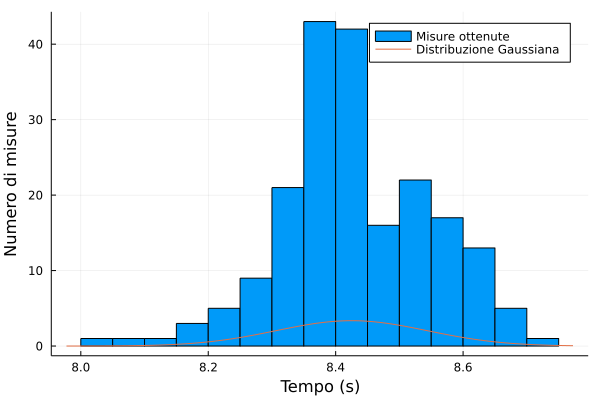

In [143]:
# istogramma delle misure
histogram(x, bins = n_bins, xlabel = "Tempo (s)", ylabel="Numero di misure", label="Misure ottenute")
plot!(t->pdf(G, t), label="Distribuzione Gaussiana")

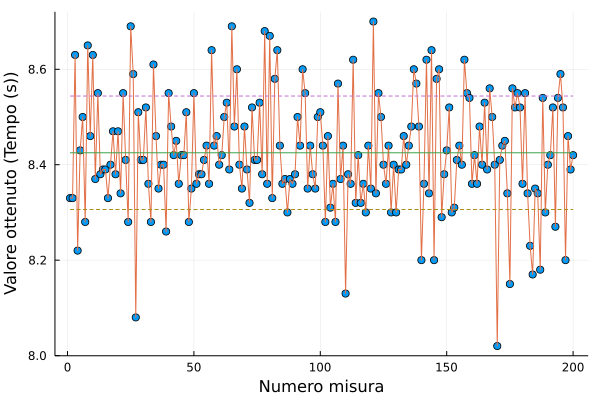

In [144]:
# distribuzione temporale delle misure
f(i) = media
d(i) = stddev + media
d2(i) = -stddev + media
plot(x, seriestype=:scatter, label="", xlabel = "Numero misura", ylabel="Valore ottenuto (Tempo (s))")
plot!(x, label="")
plot!(f, label ="")
plot!(d, label ="", ls = :dash)
plot!(d2, label ="", ls = :dash)

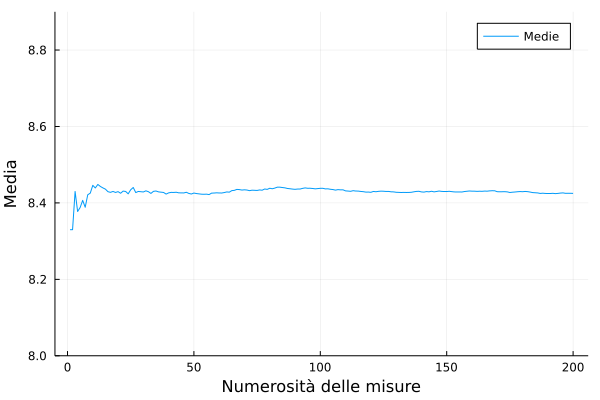

In [145]:
medie = []
deviazioni = []

for i in 1:length(x)
    m = mean(x[1:i])
    s = std(x[1:i])
    push!(deviazioni, s)
    push!(medie, m)
end

# grafico delle medie con sempre più misure)

plot(medie, label="Medie", xlabel = "Numerosità delle misure", ylabel="Media", ylims=(8,8.9))

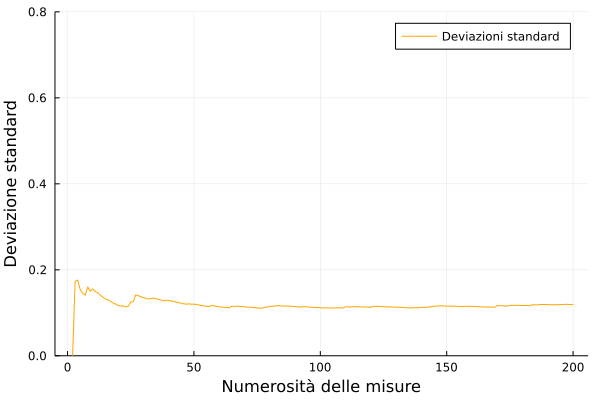

In [146]:
# grafico delle deviazioni con sempre più misure
plot(deviazioni, label="Deviazioni standard", xlabel = "Numerosità delle misure", ylabel="Deviazione standard", linecolor=:orange, ylims=(0,0.8))

In [147]:
media1 = mean(x[1:50])
stddev1 = std(x[1:50])
media2 = mean(x[150:200])
stddev2 = std(x[150:200])
println("La media dei primi 50 valori è ", media1)
println("La media degli ultimi 50 valori è ", media2)

misura1 = measurement(media1, stddev1) / 4
misura2 = measurement(media2, stddev2) / 4
g1 = 4 * π^2 * L / misura1^2
println("Il valore misurato di g sulle prime 50 misure è ", g1, " m/s^2")
g2 = 4 * π^2 * L / misura2^2
println("Il valore misurato di g sulle ultime 50 misure è ", g2, " m/s^2")

La media dei primi 50 valori è 8.425799999999999
La media degli ultimi 50 valori è 8.411176470588234
Il valore misurato di g sulle prime 50 misure è 9.79 ± 0.28 m/s^2
Il valore misurato di g sulle ultime 50 misure è 9.82 ± 0.3 m/s^2


In [148]:
misura = misura / 4
g = 4 * π^2 * L / misura^2
println("Il valore misurato di g senza correzioni è ", g, " m/s^2")
g = g * (1+theta^2/16)
println("Il valore misurato di g con correzioni è ", g, " m/s^2")

Il valore misurato di g senza correzioni è 9.79 ± 0.28 m/s^2
Il valore misurato di g con correzioni è 9.95 ± 0.28 m/s^2
